# Naive Bayes Classifiers
The Naive Bayes classifiers are a family of probabilistic classifiers that are based on applying Bayes' theorem with naive assumption on independence between the features.

These classifiers are extremely fast both in training and prediction, and they are also highly scalable and interpretable. Despite their oversimplified assumptions, they often work well on complex real-world problems, especially in text classification tasks such as spam filtering and sentiment analysis, where their naive assumption largely holds.

## Background: Bayes’ Theorem
Bayes' theorem (or Bayes' rule) is an important theorem in probability that allows us to compute the conditional probability of an event, based on prior knowledge of conditions that are related to that event.

Mathematically, the theorem states that for any events $A$ and $B$:

$$P(A \mid B) = \frac{P(B \mid A) P(A)}{P(B)}$$

- $P(A \mid B)$ is the **posterior probability** of $A$ given $B$, i.e., the probability of event $A$ occurring given that $B$ has occurred.
- $P(B \mid A)$ is the **likelihood** of $B$ given $A$, i.e., the probability of event $B$ occurring given that $A$ has occurred.
- $P(A)$ is the **prior probability** of $A$, i.e., the probability of $A$ without any prior conditions.
- $P(B)$ is the **marginal probability** of $B$, i.e., the probability of $B$ without any prior conditions.

Bayes’ theorem is particularly useful for inferring causes from their effects, since it is often easier to discern the probability of an effect given the presence or absence of its cause, rather than the other way around. For example, it is much easier to estimate the probability that a patient with meningitis will suffer from a headache, than the other way around (since many other diseases can cause an headache). In such cases, we can apply Bayes’ rule as follows:

$$P(\text{cause} \mid \text{effect}) = \frac{P(\text{effect} \mid \text{cause}) P(\text{cause})}{P(\text{effect})}$$

### Example
It is known that approximately $25\%$ of patients with lung cancer suffer from a chest pain. Assume that the incidence rate of lung cancer is $50$ per $100,000$ individuals, and the incidence rate of chest pain is $1,500$ per $100,000$ individuals worldwide. What is the probability that a patient with chest pain has a lung cancer?

Let’s write the given inputs in the form of probabilities. Let $L$ be the event of having lung cancer, and $C$ the event of having a chest pain. From the data we have we know that:

$$P(C \mid L) = 0.25$$

$$P(L) = \frac{50}{100,000} = 0.0005$$

$$P(C) = \frac{1,500}{100,000} = 0.015$$

Using Bayes' rule, the posterior probability of having a lung cancer given a chest pain is:

$$P(L \mid C) = \frac{P(C \mid L) P(L)}{P(C)} = \frac{0.25 \times 0.0005}{0.015} = 0.00833$$

i.e., there is only a $0.833\%$ chance that the patient has a lung cancer.

## The Naive Bayes Model
The Naive Bayes models are probabilistic classifiers, i.e., they not only assign a class label to a given sample, but they also provide an estimate of the probability that it belongs to that class. For example, a Naive Bayes model can predict that a given email has $80\%$ chance of being a spam and $20\%$ chance of being a ham.

Given a sample $(x, y)$, a Naive Bayes classifier computes its probability of belonging to class $k$ (i.e., $y = k$) using Bayes' rule:

$$P(y = k \mid x) = \frac{P(x \mid y = k) P(y = k)}{P(x)}$$

The probabilities on the right side of the equation are estimated from the training set. First, the **class prior probability** $P(y = k)$ can be estimated from the relative frequency of class $k$ across the training samples:

$$P(y = k) = \frac{n_k}{n}$$

where $n_k$ is the number of samples that belong to class $k$, and $n$ is the total number of samples in the training set.

Second, the marginal probability $P(x)$ can be computed by summing the terms appearing in the numerator of the Bayes' rule over all the classes:

$$P(x) = \sum_{k=1}^K P(x \mid y = k) P(y = k)$$

Since the marginal probability does not depend on the class, it is not necessary to compute it if we are only interested in assigning a hard label to the sample (without providing probability estimates).

Lastly, we need to estimate the likelihood of the features given the class, i.e., $P(x \mid y = k)$. The main issue with estimating these probabilities is that there are too many of them, and we may not have enough data in the training set to estimate them all.

For example, imagine that $x$ consists of $m$ binary features, e.g., each feature represents if a given word appears in the text document or not. In this case, in order to model $P(x \mid y)$, we will have to estimate $2^m$ conditional probabilities from the training set for every class (one for each possible combination of $x_1, \cdots, x_m$), hence $2^m K$ probabilities in total for $K$ training samples. In most cases, we will not have enough samples in the training set to estimate all these probabilities, and even if we had it would have taken us an exponential time to do it.

## The Naive Bayes Assumption
In order to reduce the number of parameters that need to be estimated, the Naive Bayes model makes the following assumption: 

> **the features are independent of each other given the class variable.**

This assumption allows us to write the probability $P(x \mid y = k)$ as a product of the conditional probabilities of each individual feature given the class:

$$P(x \mid y=k) = P(x_1 \mid y=k) \dot P(x_2 \mid y=k) \cdot P(x_m \mid y=k) = \prod_{j=1}^m P(x_j \mid y=k)$$

For example, in a spam filtering task, the Naive Bayes assumption means that words such as "rich" and "prince" contribute independently to the prediction if the email is spam or not, regardless of any possible correlation between these words.

The naive assumption largely holds in application domains such as text classification and recommendation systems, where the features are generally independent of each other.

The naive Bayes assumption reduces significantly the number of parameters that need to be estimated from the data.

**Without the Naive Bayes Assumption:**
- Each feature can take 2 values (0 or 1)
- We need to estimate the probabilities of all possible combinations of these features.
- For $m$ features, there are $2^m$ combinations.
- Thus, we need to estimate $2^m$ parameters.
    
**With the Naive Bayes Assumption:**
- We assume that each feature is independent of the others, given the class.
- We only need to estimate the probability of each feature independently, which is $P(x_i \mid y=k)$ for each $i$.
- For $m$ features, this is $m$ probabilities.
- Thus, we only need to estimate $m$ parameters.

## MAP (Maximum A-Posteriori)
Based on the naive Bayes assumption, we can now write the class posterior probability as follows:

$$P(y = k \mid x) = \frac{P(y=k) \prod_{j=1}^m P(x_j \mid y=k)}{P(x)}$$

If we are only interested in assigning a class label to the given sample (and we do not care about the probabilities), we can ignore the denominator $P(x)$, and use the following classification rule:

$$\hat{y} = \text{argmax}_{k} P(y=k) \prod_{j=1}^m P(x_j \mid y=k)$$

This is called a **MAP (Maximum A-Posteriori)** decision rule, since it chooses the hypothesis that maximizes the posterior probability.

Naive Bayes will make the correct MAP decision as long as the correct class is predicted as more probable than the other classes, even when the probability estimates are inaccurate. This provides some robustness to the model against the deficiencies in the underlying naive independence assumption.

Note that if we assume that all the priors $P(y)$ are equally likely (e.g., when we don’t have any prior information on which hypothesis is more likely), then the MAP decision rule is equivalent to the **MLE (maximum likelihood estimation)** decision rule, which chooses the model that maximizes the likelihood of the data given the model $P(x \mid y)$.

## Parameter Estimation
We are now left with the task of estimating the conditional probabilities $P(x_j \mid y = k)$ for each feature $j$ and for each class $k$. This estimation depends both on the type of the feature (e.g., discrete or continuous) and the probability distribution we assume that it has.

The assumptions on the distribution of the features are called **event models.** Each event model leads to a different type of Naive Bayes classifier. In the following sections we will discuss the different event models and how to estimate the model parameters in each one.

## Bernoulli Naive Bayes
In the Bernoulli event model, the features $x_j$ are modeled as independent binary variables with a **Bernoulli distribution,** i.e., each feature $x_j$ has a probability $p_j$ of appearing in the given sample and $1 − p_j$ for being absent from that sample. For example, in a text classification task, each feature $x_j$ may represent the occurrence or absence of the $j$-th word from the vocabulary in the text. 

In the Bernoulli event model, the probability $P(x_j \mid y = k)$ is estimated from the frequency in which feature $j$ appears in samples of class $k$:

$$P(x_j = 1 \mid y=k) = \frac{n_{jk}}{n_k}$$

where $n_{jk}$ is the number of samples in class $k$ in which feature $x_j$ appears, and $n_k$ is the total number of samples in class $k$.

## Categorical Naive Bayes
The categorical event model is an extension of the Bernoulli event model to $V$ categories (instead of only two). In this model, we assume that each feature is a categorical (discrete) variable that can take one of $V$ possible categories with some probability $p_i$, where the sum of all the probabilities is $1$.

In this event model, we need to estimate the probability $P(x_j = v \mid y = k)$ for every feature $x_j$ and every category $v$. Similar to the previous model, we estimate this probability as the frequency in which feature $j$ gets the value $v$ in samples of class $k$:

$$P(x_j=v \mid y=k) = \frac{n_{jvk}}{n_k}$$

where $n_{jvk}$ is the number of samples in class $k$ where feature $x_j$ gets the value $v$, and $n_k$ is the total number of samples in class $k$.

<hr>

### Example: Customer Purchase Prediction
Assume that we have the following table with data on the past purchases of customers in a store:

<div style="align:center">
    <img src="media/customer_data.png" width=600>
</div>

Each row in the table contains the age of the customer, whether they are a student or not, their level of income, their credit rating and whether or not they have purchased the product.

A new customer with the following properties arrives at the store:

**<Age = Young, Student = Yes, Income = Low, Credit = Excellent>**

You need to predict whether this customer will buy the product or not.

We first compute the class prior probabilities by counting the number of rows that have Buys = Yes (6 out of 10) and the number of rows that have Buys = No (4 out of 10):

$$P(\text{Buys=Yes}) = \frac{6}{10} = 0.6$$

$$P(\text{Buys=N}) = \frac{4}{10} = 0.4$$

Then, we compute the likelihood of the features in each class:

$$P(\text{Age=Young} \mid \text{Buys=Yes}) = \frac{2}{6} = 0.333$$

$$P(\text{Age=Young} \mid \text{Buys=No}) = \frac{2}{4} = 0.5$$

$$P(\text{Student=Yes} \mid \text{Buys=Yes}) = \frac{4}{6} = 0.667$$

$$P(\text{Student=Yes} \mid \text{Buys=No}) = \frac{2}{4} = 0.5$$

$$P(\text{Income=Low} \mid \text{Buys=Yes}) = \frac{1}{6} = 0.167$$

$$P(\text{Income=Low} \mid \text{Buys=No}) = \frac{2}{4} = 0.5$$

$$P(\text{Credit=Excellent} \mid \text{Buys=Yes}) = \frac{4}{6} = 0.667$$

$$P(\text{Credit=Excellent} \mid \text{Buys=No}) = \frac{1}{4} = 0.25$$

Therefore, the class posterior probabilities are:

$$P(\text{Buys=Yes} \mid x) = P(\text{Yes}) \cdot P(\text{Young} \mid \text{Yes}) \cdot P(\text{Student} \mid \text{Yes}) \cdot P(\text{Low} \mid \text{Yes}) \cdot P(\text{Excellent} \mid \text{Yes}) = 0.6 \cdot 0.333 \cdot 0.667 \cdot 0.667 \alpha = 0.0148\alpha$$

$$P(\text{Buys=No} \mid x) = P(\text{No}) \cdot P(\text{Young} \mid \text{No}) \cdot P(\text{Student} \mid \text{No}) \cdot P(\text{Low} \mid \text{No}) \cdot P(\text{Excellent} \mid \text{No}) = 0.4 \cdot 0.5 \cdot 0.5 \cdot 0.5 \alpha = 0.25\alpha$$

$\alpha$ is the normalization factor $(\alpha = \frac{1}{P(x)})$

Since $P(\text{Buys=Yes} \mid x) > P(\text{Buys=No} \mid x)$, our prediction is that the customer will buy the product.

If we want to get the actual probability that the customer will buy the product, we can first find the normalization factor using the fact that the two posterior probabilities must sum to 1:

$$0.0148 \alpha + 0.0125 \alpha = 1 \rightarrow \frac{1}{0.0148 + 0.0125} = 36.63$$

Then, we can plug it in the posterior probability for $\text{Buy=Yes}$:

$$P(\text{Buys=Yes} \mid x) = 0.0148 \cdot 36.63 = 0.5421$$

The probability that the customer will buy the product is $54.21\%$.

## Multinomial Naive Bayes
In the multinomial event model, we assume that the data set has only one categorical feature $x$ that can take one of $m$ categories, and each feature vector $(x_1, \cdots, x_m)$ is a histogram, where $x_j$ counts the number of times $x$ had the value $j$ in that particular instance.

This event model is particularly useful when working with text documents, where $m$ is the number of words in the vocabulary, and each feature $x_j$ represents the number of times the $j$-th word from the vocabulary appears in the document. This representation is called the **bag-of-words** model:

<div style="align:center">
    <img src="media/bag_of_words.png" width=600>
</div>

In this event model, we estimate the probability $P(x=v \mid y=k)$ as the frequency in which feature $x$ gets the value $v$ in samples of class $k$:

$$P(x=v \mid y=k) = \frac{n_{vk}}{n_k}$$

where $n_{vk}$ is the number of samples in class $k$ in which $x$ gets the value $v$, and $n_k$ is the total number of samples in class $k$.

### Example: Spam Filter
We would like to build a spam filter based on a training set with 100 emails: 80 of them are non-spam (ham) and 20 of them are spam. The counts of the words in each type of email are given in the following tables:

<div style="align:center">
    <img src="media/spam_ham.png" width=600>
</div>

A new email has arrived with the text "rich friend need money". Is this a ham or a spam?

Let’s first compute the class prior probabilities:

$$P(\text{Ham}) = \frac{80}{100} = 0.8$$

$$P(\text{Spam}) = \frac{20}{100} = 0.2$$

Next, we estimate the likelihoods of the words in each type of email. The total number of words in the ham emails is: $80 + 5 + 5 + 20 + 50 + 40 = 200$, and the total number of words in the spam emails is: $20 + 20 + 30 + 25 + 25 = 120$. Therefore, the likelihoods of the words are:

$$P(\text{rich} \mid \text{Ham}) = \frac{5}{200} = 0.025$$

$$P(\text{rich} \mid \text{Spam}) = \frac{30}{120} = 0.25$$

$$P(\text{friend} \mid \text{Ham}) = \frac{80}{200} = 0.4$$

$$P(\text{friend} \mid \text{Spam}) = \frac{20}{120} = 0.167$$

$$P(\text{need} \mid \text{Ham}) = \frac{50}{200} = 0.25$$

$$P(\text{need} \mid \text{Spam}) = \frac{25}{120} = 0.208$$

$$P(\text{money} \mid \text{Ham}) = \frac{20}{200} = 0.1$$

$$P(\text{money} \mid \text{Spam}) = \frac{25}{120} = 0.208$$

Consequently, the class posterior probabilities are:

$$P(\text{Ham} \mid x) = P(\text{Ham}) \cdot P(\text{rich} \mid \text{Ham}) \cdot P(\text{friend} \mid \text{Ham}) \cdot P(\text{need} \mid \text{Ham}) \cdot P(\text{money} \mid \text{Ham}) = 0.8 \cdot 0.025 \cdot 0.4 \cdot 0.25 \cdot 0.1\alpha = 0.0002\alpha$$

$$P(\text{Spam} \mid x) = P(\text{Spam}) \cdot P(\text{rich} \mid \text{Spam}) \cdot P(\text{friend} \mid \text{Spam}) \cdot P(\text{need} \mid \text{Spam}) \cdot P(\text{money} \mid \text{Spam}) = 0.2 \cdot 0.25 \cdot 0.167 \cdot 0.208 \cdot 0.208\alpha = 0.00036\alpha$$

Therefore, our prediction is that the email is spam.

## Document Classification Example
We will use MultinomialNB to solve a document classification task. The data set we are going to use is the 20 newsgroups dataset, which consists of 18,846 newsgroups posts, partitioned (nearly) evenly across 20 different topics. This data set has been widely used in research of text applications in machine learning, including document classification and clustering.

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from sklearn.datasets import fetch_20newsgroups

By default, the text documents contain some metadata such as headers (e.g., the date of the post), footers (signatures) and quotes to other posts. Since these features are not relevant for the text classification task, we will strip them out by using the remove parameter:

Note that the first time you call this function it may take a few minutes to download all the documents, after which they will be cached locally in the folder `~/scikit_learn_data.`

In [2]:
train_set = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
test_set = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

In [3]:
X_train, y_train = train_set.data, train_set.target
X_test, y_test = test_set.data, test_set.target

In [4]:
print('Documents in training set:', len(X_train))
print('Documents in test set:', len(X_test))

Documents in training set: 11314
Documents in test set: 7532


In [5]:
categories = train_set.target_names
categories

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [9]:
print(f"Document:\n{X_train[0]}")

print(f"\nLabel of Document: {categories[y_train[0]]}")

Document:
I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Label of Document: rec.autos


### Converting Text to Vectors
In order to feed text documents into machine learning models, we first need to convert them into vectors of numerical values (i.e., vectorize the text). This process typically involves preprocessing and cleaning of the text, and then choosing a suitable numerical representation for the words in the text.

After cleaning the text, we need to choose how to vectorize it into a numerical vector. The most common approaches are:

- **1. Bag-of-words (BOW) model.** In this model, each document is represented by a word counts vector (similar to the one we have used in the spam filter example).

- **2. TF-IDF (Term Frequency times Inverse Document Frequency)** measures how relevant a word is to a document by multiplying two metrics:
    - TF (Term Frequency) - how many times the word appears in the document.
    - IDF (Inverse Document Frequency) - the inverse of the frequency in which the word appears in documents across the entire corpus.
    
    The idea is to decrease the weight of words that occur frequently in the corpus, while increasing the weight of words that occur rarely (and thus are more indicative of the document’s category).

- **3. Word embeddings.** In this approach, words are mapped into real-valued vectors in such a way that words with similar meaning have close representation in the vector space.

<hr>

Scikit-Learn provides the following two transformers, which support both text preprocessing and vectorization:

- **CountVectorizer** uses the bag-of-words model.
- **TfIdfVectorizer** uses the TF-IDF representation.

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)

In [11]:
print(X_train_vec.shape)

(11314, 101322)


There are 11,314 documents and 101,322 unique tokens in the vocabulary of the corpus. We can examine these tokens by calling the method `get_feature_names_out()` of the vectorizer:

In [12]:
vocab = vectorizer.get_feature_names_out()
print(vocab[50000:50010]) # pick a subset of the tokens

['innacurate' 'innappropriate' 'innards' 'innate' 'innately' 'inneficient'
 'inner' 'innermost' 'innertubes' 'innervation']


The TF-IDF vectors are very sparse, with an average of 67 non-zero components out of more than 100,000:

In [13]:
print(X_train_vec.nnz / X_train_vec.shape[0])

66.802987449178


Let’s also vectorize the documents in the test set (note that on the test set we call the `transform` method instead of `fit_transform`):

In [14]:
X_test_vec = vectorizer.transform(X_test)

## Building the Model
Let’s now build a multinomial Naive Bayes classifier and fit it to the training set.

Note that we need to set the smoothing parameter $\alpha$ to a very small number, since the TF-IDF values are scaled to be between 0 and 1, so the default $\alpha=1$ would cause a dramatic shift of the values.

In [15]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB(alpha=0.01)
clf.fit(X_train_vec, y_train)

MultinomialNB(alpha=0.01)

In [16]:
from sklearn.metrics import f1_score

accuracy_train = clf.score(X_train_vec, y_train)
y_train_pred = clf.predict(X_train_vec)
f1_train = f1_score(y_train, y_train_pred, average='macro')

print(f'Accuracy (train): {accuracy_train:.4f}')
print(f'F1 score (train): {f1_train:.4f}')

Accuracy (train): 0.9595
F1 score (train): 0.9622


In [17]:
accuracy_test = clf.score(X_test_vec, y_test)
y_test_pred = clf.predict(X_test_vec)
f1_test = f1_score(y_test, y_test_pred, average='macro')

print(f'Accuracy (test): {accuracy_test:.4f}')
print(f'F1 score (test): {f1_test:.4f}')

Accuracy (test): 0.7010
F1 score (test): 0.6844


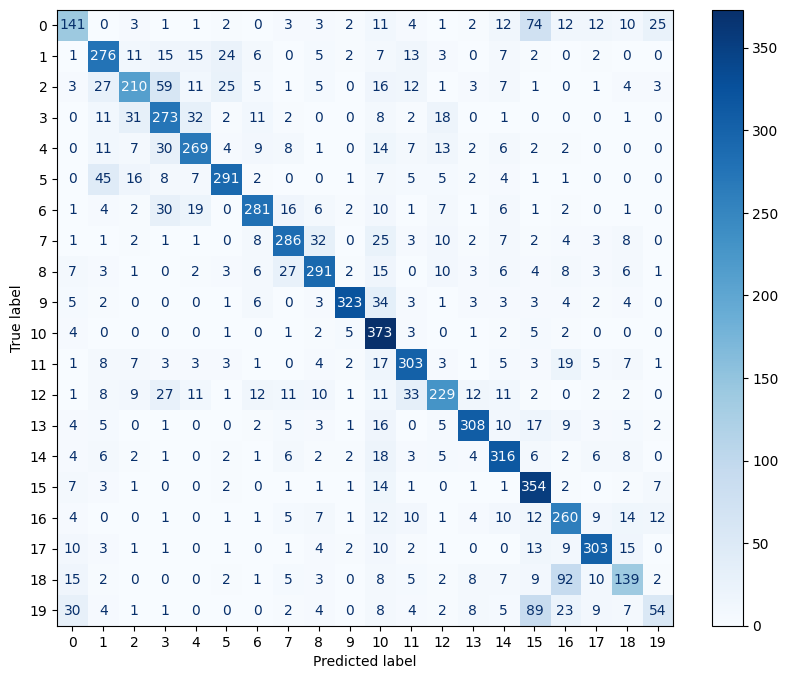

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(ax=ax, cmap='Blues')

As we can see, most of the confusions occur between highly correlated topics, for example:

- 74 confusions between topic 0 (alt.atheism) and topic 15 (soc.religion.christian)
- 92 confusions between topic 18 (talk.politics.misc) and topic 16 (talk.politics.guns)
- 89 confusions between topic 19 (talk.religion.misc) and topic 15 (soc.religion.christian)

## Benchmarking
We will benchmark the Naive Bayes model against four other classifiers: logistic regression, KNN, random forest and AdaBoost.

In [21]:
import time

def benchmark(classifiers, names, X_train, y_train, X_test, y_test, verbose=True):
    evaluations = []
    
    for clf, name in zip(classifiers, names):
        evaluation = {}
        evaluation['classifier'] = name

        start_time = time.time()
        clf.fit(X_train, y_train)
        evaluation['training_time'] = round(time.time() - start_time, 4)

        evaluation['accuracy'] = round(clf.score(X_test, y_test), 4)
        y_test_pred = clf.predict(X_test)
        evaluation['f1_score'] = round(f1_score(y_test, y_test_pred, average='macro'), 4)
        
        if verbose:
            print(evaluation)
        evaluations.append(evaluation)
    return evaluations

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

classifiers = [clf, LogisticRegression(), KNeighborsClassifier(), RandomForestClassifier(), AdaBoostClassifier()]
names = ['Multinomial NB', 'Logistic Regression', 'KNN', 'Random Forest', 'AdaBoost']

evaluations = benchmark(classifiers, names, X_train_vec, y_train, X_test_vec, y_test)

{'classifier': 'Multinomial NB', 'training_time': 0.0465, 'accuracy': 0.701, 'f1_score': 0.6844}
{'classifier': 'Logistic Regression', 'training_time': 22.1827, 'accuracy': 0.6909, 'f1_score': 0.6778}
{'classifier': 'KNN', 'training_time': 0.004, 'accuracy': 0.0757, 'f1_score': 0.0501}
{'classifier': 'Random Forest', 'training_time': 191.6339, 'accuracy': 0.6184, 'f1_score': 0.5985}
{'classifier': 'AdaBoost', 'training_time': 16.5727, 'accuracy': 0.3659, 'f1_score': 0.4015}


Text(0, 0.5, 'Classifier')

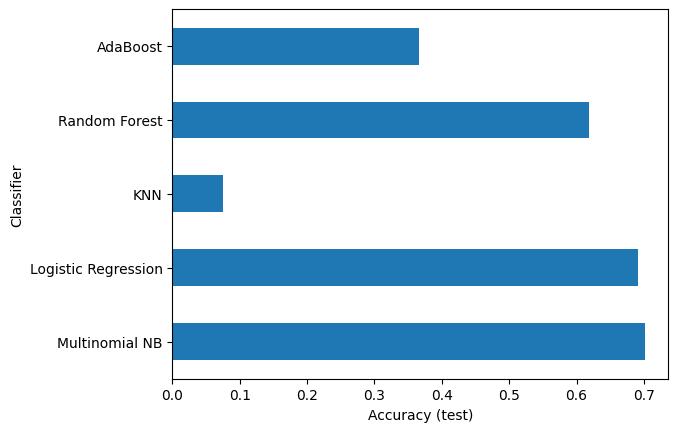

In [25]:
df = pd.DataFrame(evaluations).set_index('classifier')

df['accuracy'].plot.barh()
plt.xlabel('Accuracy (test)')
plt.ylabel('Classifier')

Text(0.5, 0, 'F1 score (test)')

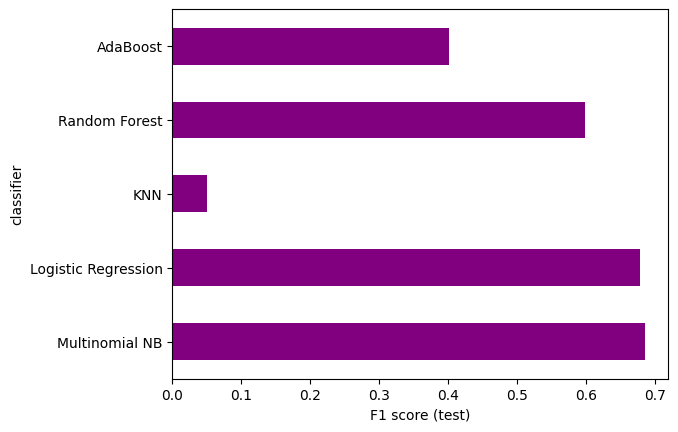

In [26]:
df['f1_score'].plot.barh(color='purple')
plt.xlabel('F1 score (test)')

Text(0, 0.5, 'Classifier')

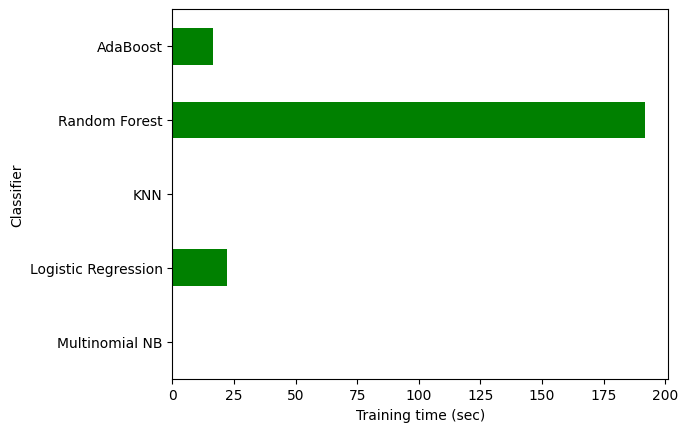

In [27]:
df['training_time'].plot.barh(color='green')
plt.xlabel('Training time (sec)')
plt.ylabel('Classifier')

## Finding the Most Informative Features
The Naive Bayes model also allows us to get the most informative features of each class, i.e., the features with the highest likelihood $P(x_j  \mid y)$.

The `MultinomialNB` class has an attribute named `feature_log_prob_`, which provides the log probability of the features for each class in a matrix of shape (n_classes, n_features).

Using this attribute, let’s write a function to find the 10 most informative features (tokens) in each category:

In [28]:
def show_top_n_features(clf, vectorizer, categories, n=10):
    feature_names = vectorizer.get_feature_names_out()
    
    for i, category in enumerate(categories):       
        top_n = np.argsort(clf.feature_log_prob_[i])[-n:]
        print(f"{category}: {' '.join(feature_names[top_n])}")

In [29]:
show_top_n_features(clf, vectorizer, categories)

alt.atheism: islam atheists say just religion atheism think don people god
comp.graphics: looking format 3d know program file files thanks image graphics
comp.os.ms-windows.misc: card problem thanks driver drivers use files dos file windows
comp.sys.ibm.pc.hardware: monitor disk thanks pc ide controller bus card scsi drive
comp.sys.mac.hardware: know monitor does quadra simms thanks problem drive apple mac
comp.windows.x: using windows x11r5 use application thanks widget server motif window
misc.forsale: asking email sell price condition new shipping offer 00 sale
rec.autos: don ford new good dealer just engine like cars car
rec.motorcycles: don just helmet riding like motorcycle ride bikes dod bike
rec.sport.baseball: braves players pitching hit runs games game baseball team year
rec.sport.hockey: league year nhl games season players play hockey team game
sci.crypt: people use escrow nsa keys government chip clipper encryption key
sci.electronics: don thanks voltage used know does lik

## Naive Bayes Summary

**Pros:**
- Extremely fast both in training and prediction
- Provides class probability estimates
- Can be used both for binary and multi-class classification problems
- Requires a small amount of training data to estimate its parameters
- Highly interpretable
- Highly scalable (the number of parameters is linear in the number of features)
- Works well with high-dimensional data
- Robust to noise (the noisy samples are averaged out when estimating the conditional probabilities)
- Can deal with missing values (the missing values are ignored when computing the likelihoods of the features)
- No hyperparameters to tune (except for the smoothing parameter, which is rarely changed)

**Cons:**
- Relies on the Naive Bayes assumption which does not hold in many real-world domains
- Correlation between the features can degrade the performance of the model
- Generally outperformed by more complex models
- The zero frequency problem: if a categorical feature has a category that was not observed in the training set, the model will assign a zero probability to its occurrence. Smoothing alleviates this problem but does not solve it completely.
- Cannot handle continuous attributes without discretization or making assumptions on their distribution
- Can be used only for classification tasks